In [1]:
import json
import pandas as pd

data = [json.loads(line) for line in open('../data/Ferrara2023-citizens-individualChallenges.json')]
data = [d for d in data if d['concept']['modelName'] != 'survey' and d['concept']['state'] in ['COMPLETED', 'FAILED']]
filtered_data = [
    {
        'user_id': d['playerId'],
        'counter': d['concept']['fields']['counterName'],
        'target': int(d['concept']['fields']['target']),
        'periodTarget': d['concept']['fields']['periodTarget'],
        'start': d['concept']['start'],
        'end': d['concept']['end'],
        'completed': int(d['concept']['completed']),
    }
    for d in data
]

df = pd.DataFrame(filtered_data)
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df['periodTarget'] = df['periodTarget'].fillna(1).astype(int)
df['item_id'] = df['counter'] + '/' + df['target'].astype(str) + '/' + df['periodTarget'].astype(str)
df = df[df['start'] < '2023-09-17']
df['month'] = df['start'].dt.strftime('%B')

df.sort_values('start', ascending=True, inplace=True, ignore_index=True)

data[500]

{'_id': 'ZGSJoCayJR3M6jOD',
 'name': 'w5_rs__correctErraticBehaviour_4f70a87c-3f51-4b4f-aade-bfaeacc3fb07',
 'playerId': 'u_4c98a4e4-082a-4e00-b27e-08904348d747',
 'gameId': '6437ddadf8e59353e50d143e',
 'concept': {'modelName': 'repetitiveBehaviour',
  'fields': {'bonusScore': 100.0,
   'typePoi': None,
   'weblink': None,
   'bonusPointType': 'green leaves',
   'periodName': 'daily',
   'category': None,
   'target': 17.692307692307693,
   'surveyType': None,
   'link': None,
   'wi': None,
   'counterName': 'green leaves',
   'periodTarget': 5.0,
   'percentage': None,
   'baseline': None},
  'start': '2023-05-21 22:00:00.000',
  'end': '2023-05-28 21:59:00.000',
  'completed': False,
  'state': 'FAILED',
  'stateDate': {'ASSIGNED': '2023-05-17 08:00:32.347',
   'FAILED': '2023-05-28 21:59:00.000',
   'ACTIVE': '2023-05-22 06:19:34.639',
   'COMPLETED': None,
   'PROPOSED': None},
  'group': False,
  'priority': 1,
  'forced': False,
  'visibility': {'hidden': True, 'disclosureDate':

In [2]:
user = df[['user_id']].drop_duplicates()

def get_difficulty_level(df):
    df['difficulty'] = pd.cut(df['difficulty'], bins=5, labels=False)
    return df

item = df[['counter', 'target', 'periodTarget']].drop_duplicates()
item['difficulty'] = item['target'] * item['periodTarget']
item['item_id'] = item['counter'] + '/' + item['target'].astype(str) + '/' + item['periodTarget'].astype(str)
item = item.groupby('counter').apply(get_difficulty_level, include_groups=False).reset_index().drop('level_1', axis=1)
item.sort_values(['counter', 'target', 'difficulty'], ascending=True, inplace=True, ignore_index=True)
item

,counter,target,periodTarget,difficulty,item_id
0,Bike_Km,1,1,0,Bike_Km/1/1
1,Bike_Km,2,1,0,Bike_Km/2/1
2,Bike_Km,3,1,0,Bike_Km/3/1
3,Bike_Km,4,1,0,Bike_Km/4/1
4,Bike_Km,5,1,0,Bike_Km/5/1
...,...,...,...,...,...
411,green leaves,1200,1,3,green leaves/1200/1
412,green leaves,1300,1,3,green leaves/1300/1
413,green leaves,1400,1,3,green leaves/1400/1
414,green leaves,1700,1,4,green leaves/1700/1


In [3]:
df = df.merge(item[['item_id', 'difficulty']], on='item_id')
df

,user_id,counter,target,periodTarget,start,end,completed,item_id,month,difficulty
0,u_0bea6988-bd00-4aa6-a456-4285744356ee,Walk_Km,1,1,2023-04-23 22:00:00,2023-04-30 22:00:00,1,Walk_Km/1/1,April,0
1,u_f4b95ec9-5f53-48d8-8adf-fa61be00c967,green leaves,30,2,2023-04-23 22:00:00,2023-04-30 22:00:00,1,green leaves/30/2,April,0
2,u_f2d8d95d-6cc9-4e8e-b97d-88d0c1b0ae27,green leaves,30,2,2023-04-23 22:00:00,2023-04-30 22:00:00,1,green leaves/30/2,April,0
3,u_f2d8d95d-6cc9-4e8e-b97d-88d0c1b0ae27,Walk_Km,1,1,2023-04-23 22:00:00,2023-04-30 22:00:00,1,Walk_Km/1/1,April,0
4,u_e4a7a7fcd26644e9961e3e05bf98454e,green leaves,30,2,2023-04-23 22:00:00,2023-04-30 22:00:00,1,green leaves/30/2,April,0
...,...,...,...,...,...,...,...,...,...,...
5858,u_553c90102f4e48f88e4617393a5550a1,Walk_Km,1,1,2023-09-10 22:00:00,2023-09-17 21:59:00,0,Walk_Km/1/1,September,0
5859,u_54061e0911df4785a154a10fdf6def06,green leaves,1,5,2023-09-10 22:00:00,2023-09-17 21:59:00,0,green leaves/1/5,September,0
5860,u_54061e0911df4785a154a10fdf6def06,Walk_Km,1,1,2023-09-10 22:00:00,2023-09-17 21:59:00,0,Walk_Km/1/1,September,0
5861,u_614d26e70185417d831235a03703fdb4,Walk_Km,1,1,2023-09-10 22:00:00,2023-09-17 21:59:00,1,Walk_Km/1/1,September,0


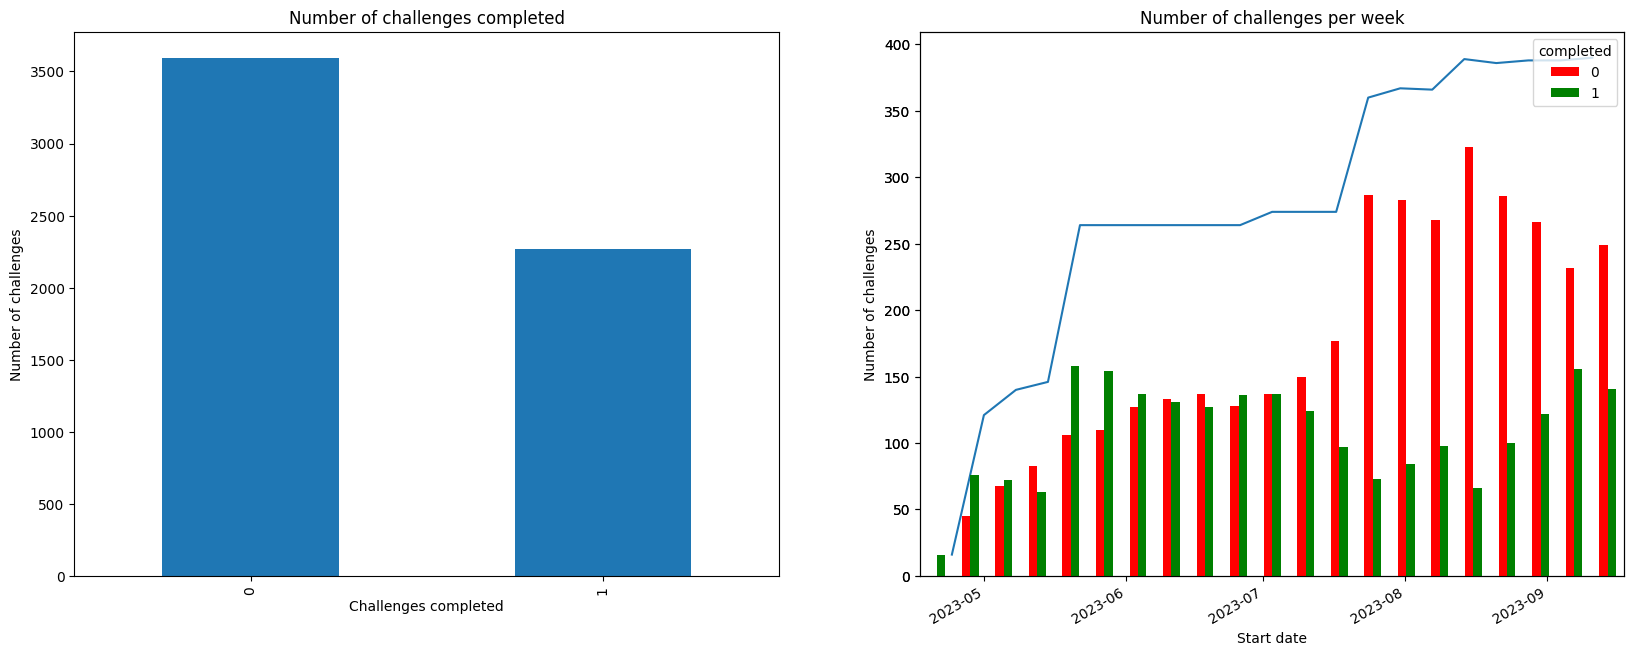

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

df['completed'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Number of challenges completed')
ax1.set_xlabel('Challenges completed')
ax1.set_ylabel('Number of challenges')

df.groupby('start').size().plot(ax=ax2)
ax3 = ax2.twiny()
df.groupby(['start', 'completed']).size().unstack().plot(ax=ax3, legend=True, stacked=False, kind='bar', color=['red', 'green'])
ax3.set_xlabel('')
ax3.set_xticks([])

ax2.set_title('Number of challenges per week')
ax2.set_xlabel('Start date')
ax2.set_ylabel('Number of challenges')

plt.show()

In [5]:
dataset = df[[
    'user_id',
    'item_id',
    'completed'
]].copy()

test_index = dataset.groupby('user_id').tail(5).index
train_index = dataset.index.difference(test_index)

test_index.shape, train_index.shape

((972,), (4891,))

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ct_fm = ColumnTransformer([
    ('user_id', OrdinalEncoder(), ['user_id']),
    ('item_id', OrdinalEncoder(), ['item_id']),
    ],
    remainder='passthrough'
)

fm_dataset = ct_fm.fit_transform(dataset)
fm_dataset.shape

(5863, 3)

In [7]:
from sklearn.preprocessing import OneHotEncoder

ct_lr = ColumnTransformer([
    ('user_id', OneHotEncoder(sparse_output=False), ['user_id']),
    ('item_id', OneHotEncoder(sparse_output=False), ['item_id']),
    ],
    remainder='passthrough'
)

lr_dataset = ct_lr.fit_transform(dataset)
lr_dataset.shape

(5863, 612)

In [8]:
from sklearn.linear_model import LogisticRegression

X_train, X_test = lr_dataset[train_index], lr_dataset[test_index]
y_train, y_test = X_train[:, -1], X_test[:, -1]
X_train, X_test = X_train[:, :-1], X_test[:, :-1]

lr = LogisticRegression()
lr.fit(X_train, y_train)

probs = lr.predict_proba(X_test)[:, 1]

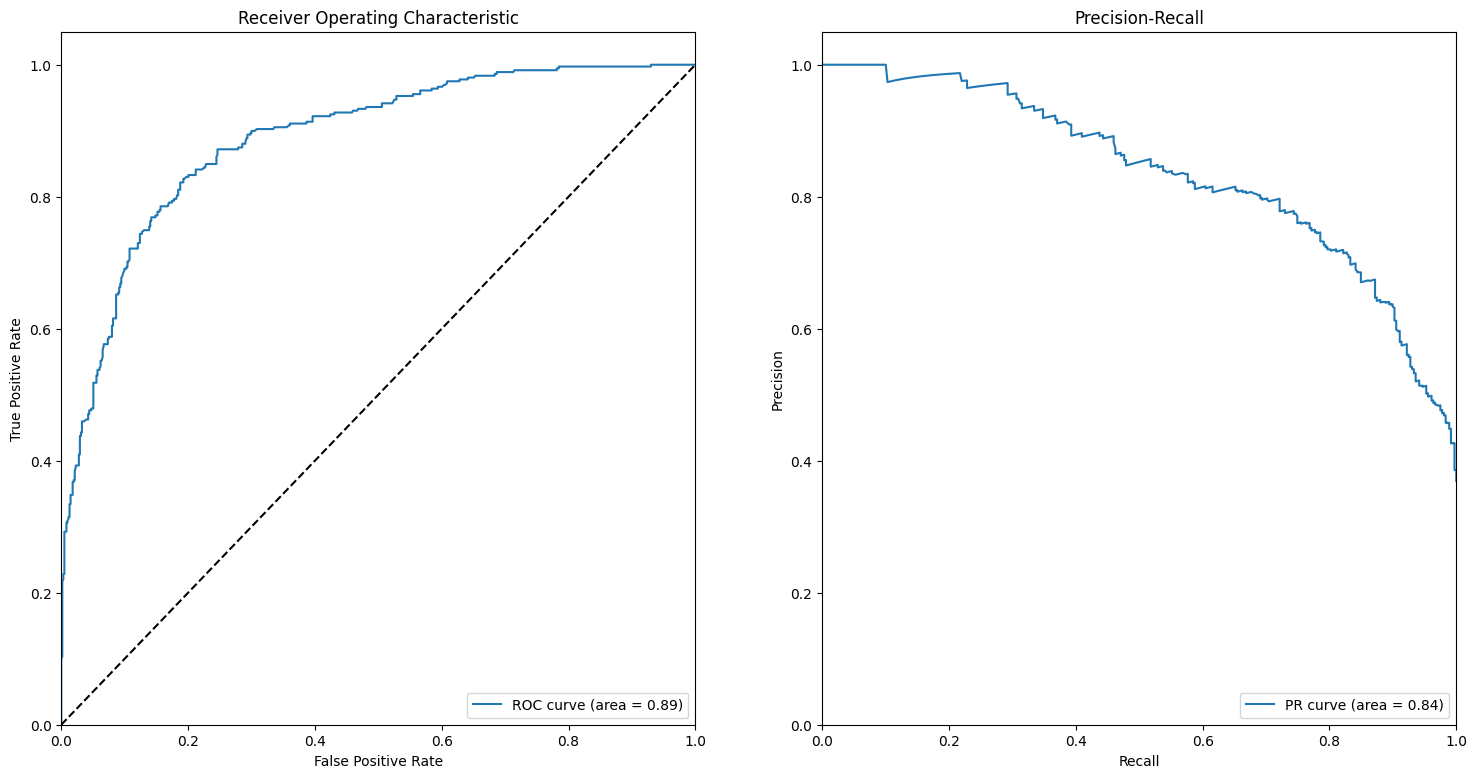

In [9]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic')
ax1.legend(loc="lower right")

ax2.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall')
ax2.legend(loc="lower right")

plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class FactorizationMachine(nn.Module):
    def __init__(self, field_dims, num_factors):
        super(FactorizationMachine, self).__init__()
        num_inputs = sum(field_dims)
        self.embedding = nn.Embedding(num_inputs, num_factors)
        self.fc = nn.Linear(num_inputs, 1)
        self.linear = nn.Linear(num_inputs, 1, bias=True)
    
    def forward(self, x):
        square_of_sum = torch.sum(self.embedding(x), dim=1).pow(2)
        sum_of_square = torch.sum(self.embedding(x).pow(2), dim=1)
        x = self.linear(self.fc(x).sum(1)) + 0.5 * (square_of_sum - sum_of_square).sum(1, keepdim=True)
        return torch.sigmoid(x)
